In [1]:
cd ..

/home/jovyan/gt_ml_project_1


In [2]:
%run __init__.py

In [3]:
%run src/load_data.py

In [4]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC

In [5]:
from lib.benchmark import run_model, plot_results
from lib.benchmark import pipeline_basic
from sklearn.model_selection import GridSearchCV, StratifiedKFold
import seaborn as sns
from tqdm import tqdm
from sklearn.metrics import f1_score

sns.set()

In [6]:
adt_data = data['adult']['train']['engineered']
adt_lbls = data['adult']['train']['labels']
mad_data = data['madelon']['train']['raw_data']
mad_lbls = data['madelon']['train']['labels']

In [7]:
adt_test_data = data['adult']['test']['engineered']
adt_test_labels = data['adult']['test']['labels']
mad_test_data = data['madelon']['test']['raw_data']
mad_test_labels = data['madelon']['test']['labels']

In [9]:
results = {}


In [10]:
# fit with regular data, no scaling
knn_mad_clf = KNeighborsClassifier(n_neighbors=10, weights = 'distance', p=2)  
knn_adult_clf = KNeighborsClassifier(n_neighbors=25, weights = 'distance', p=1)

knn_mad_clf.fit(mad_data, mad_lbls)
knn_mad_preds = knn_mad_clf.predict(mad_test_data)

knn_adult_clf.fit(adt_data, adt_lbls)
knn_adult_preds = knn_adult_clf.predict(adt_test_data)

results['knn_mad_f1'] = f1_score(mad_test_labels, knn_mad_preds)
results['knn_adult_f1'] = f1_score(adt_test_labels, knn_adult_preds) 

In [11]:
results

{'knn_adult_f1': 0.66983091070898837, 'knn_mad_f1': 0.71024734982332149}

In [12]:
svm_mad_clf = SVC(C=0.1, kernel='poly')
svm_adult_clf = SVC(C=0.1, kernel='linear')

scaler_mad = StandardScaler()
scaler_adt = StandardScaler()

scaled_mad_data = scaler_mad.fit_transform(mad_data)
scaled_adt_data = scaler_adt.fit_transform(adt_data)
scaled_mad_test_data = scaler_mad.transform(mad_test_data)
scaled_adt_test_data = scaler_adt.transform(adt_test_data)

svm_mad_clf.fit(scaled_mad_data, mad_lbls)
svm_mad_preds = svm_mad_clf.predict(scaled_mad_test_data)
results['svm_mad_f1'] = f1_score(mad_test_labels, svm_mad_preds)


svm_adult_clf.fit(scaled_adt_data, adt_lbls)
svm_adult_preds = svm_adult_clf.predict(scaled_adt_data)
results['svm_adult_f1'] = f1_score(adt_lbls, svm_adult_preds)

In [13]:
results

{'knn_adult_f1': 0.66983091070898837,
 'knn_mad_f1': 0.71024734982332149,
 'svm_adult_f1': 0.65074181207427451,
 'svm_mad_f1': 0.66666666666666663}

In [14]:
dt_mad_clf = DecisionTreeClassifier(max_depth=5)
dt_adult_clf = DecisionTreeClassifier(max_depth=10)

dt_mad_clf.fit(mad_data, mad_lbls)
dt_mad_preds = dt_mad_clf.predict(mad_test_data)

dt_adult_clf.fit(adt_data, adt_lbls)
dt_adult_preds = dt_adult_clf.predict(adt_test_data)

results['dt_mad_f1'] = f1_score(mad_test_labels, dt_mad_preds)
results['dt_adult_f1'] = f1_score(adt_test_labels, dt_adult_preds) 

In [15]:
results

{'dt_adult_f1': 0.66729030246336141,
 'dt_mad_f1': 0.80191693290734822,
 'knn_adult_f1': 0.66983091070898837,
 'knn_mad_f1': 0.71024734982332149,
 'svm_adult_f1': 0.65074181207427451,
 'svm_mad_f1': 0.66666666666666663}

In [16]:
adaboost_mad_clf = AdaBoostClassifier(n_estimators=25, learning_rate=0.01)
adaboost_adult_clf = AdaBoostClassifier(n_estimators=25, learning_rate=1.0)


adaboost_mad_clf.fit(mad_data, mad_lbls)
adaboost_mad_preds = adaboost_mad_clf.predict(mad_test_data)

adaboost_adult_clf.fit(adt_data, adt_lbls)
adaboost_adult_preds = adaboost_adult_clf.predict(adt_test_data)

results['adaboost_mad_f1'] = f1_score(mad_test_labels, adaboost_mad_preds)
results['adaboost_adult_f1'] = f1_score(adt_test_labels, adaboost_adult_preds) 

In [17]:
results

{'adaboost_adult_f1': 0.67154620311070445,
 'adaboost_mad_f1': 0.63074484944532483,
 'dt_adult_f1': 0.66729030246336141,
 'dt_mad_f1': 0.80191693290734822,
 'knn_adult_f1': 0.66983091070898837,
 'knn_mad_f1': 0.71024734982332149,
 'svm_adult_f1': 0.65074181207427451,
 'svm_mad_f1': 0.66666666666666663}

In [18]:
mlp_mad_clf = MLPClassifier()
mlp_adult_clf = MLPClassifier()

mlp_mad_clf.fit(scaled_mad_data, mad_lbls)
mlp_mad_preds = mlp_mad_clf.predict(scaled_mad_test_data)

mlp_adult_clf.fit(scaled_adt_data, adt_lbls)
mlp_adult_preds = mlp_adult_clf.predict(scaled_adt_test_data)

results['mlp_mad_f1'] = f1_score(mad_test_labels, mlp_mad_preds)
results['mlp_adult_f1'] = f1_score(adult_test_labels, mlp_adult_preds)

In [22]:
results['dummy_adult_f1'] = 0.388067
results['dummy_mad_f1'] = 0.666667

In [40]:
values, keys

([0.66983091070898837,
  0.65074181207427451,
  0.66729030246336141,
  0.67154620311070445,
  0.65293761356753488,
  0.388067],
 ['knn_adult_f1',
  'svm_adult_f1',
  'dt_adult_f1',
  'adaboost_adult_f1',
  'mlp_adult_f1',
  'dummy_adult_f1'])

([<matplotlib.axis.XTick at 0x7fae39f850b8>,
 <a list of 6 Text xticklabel objects>)

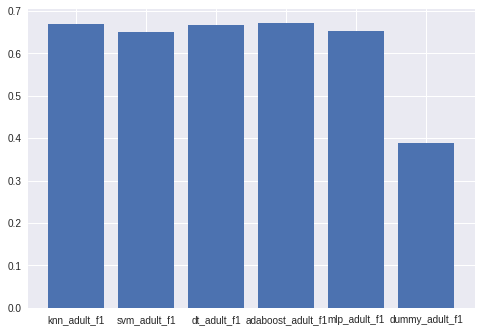

In [39]:
keys = [key for key, val in results.items() if 'adu' in key]
values = [val for key, val in results.items() if 'adu' in key]

plt.bar(range(6), values)
plt.xticks(range(6), keys)


In [20]:
final_results = pd.Series(results)
final_results.to_csv("results/final_results.csv")

In [21]:
ls

base_results_madelon.p  data/  __init__.py  lib/       results/
base_results.p          doc/   ipynb/       README.md  src/


In [40]:
print(final_results)

adaboost_adult_f1    0.671546
adaboost_mad_f1      0.630745
dt_adult_f1          0.666875
dt_mad_f1            0.803828
knn_adult_f1         0.669831
knn_mad_f1           0.710247
mlp_adult_f1         0.639294
mlp_mad_f1           0.585526
svm_adult_f1         0.650742
svm_mad_f1           0.666667
dtype: float64
